In [2]:
import pandas as pd
import numpy as np 

d1 = pd.read_csv("stroke.csv")
print(d1)

         id  gender   age  hypertension  heart_disease ever_married  \
0      9046    Male  67.0             0              1          Yes   
1     51676  Female  61.0             0              0          Yes   
2     31112    Male  80.0             0              1          Yes   
3     60182  Female  49.0             0              0          Yes   
4      1665  Female  79.0             1              0          Yes   
...     ...     ...   ...           ...            ...          ...   
5105  18234  Female  80.0             1              0          Yes   
5106  44873  Female  81.0             0              0          Yes   
5107  19723  Female  35.0             0              0          Yes   
5108  37544    Male  51.0             0              0          Yes   
5109  44679  Female  44.0             0              0          Yes   

          work_type Residence_type  avg_glucose_level   bmi   smoking_status  \
0           Private          Urban             228.69  36.6  former

First Look at data

In [3]:
d1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [12]:
from sklearn.model_selection import train_test_split

traindata, testdata = train_test_split(d1, test_size=0.20) #test_size=0.2 means that 20% of data will be for testing, 80% for training
traindata.shape, testdata.shape



((4088, 12), (1022, 12))

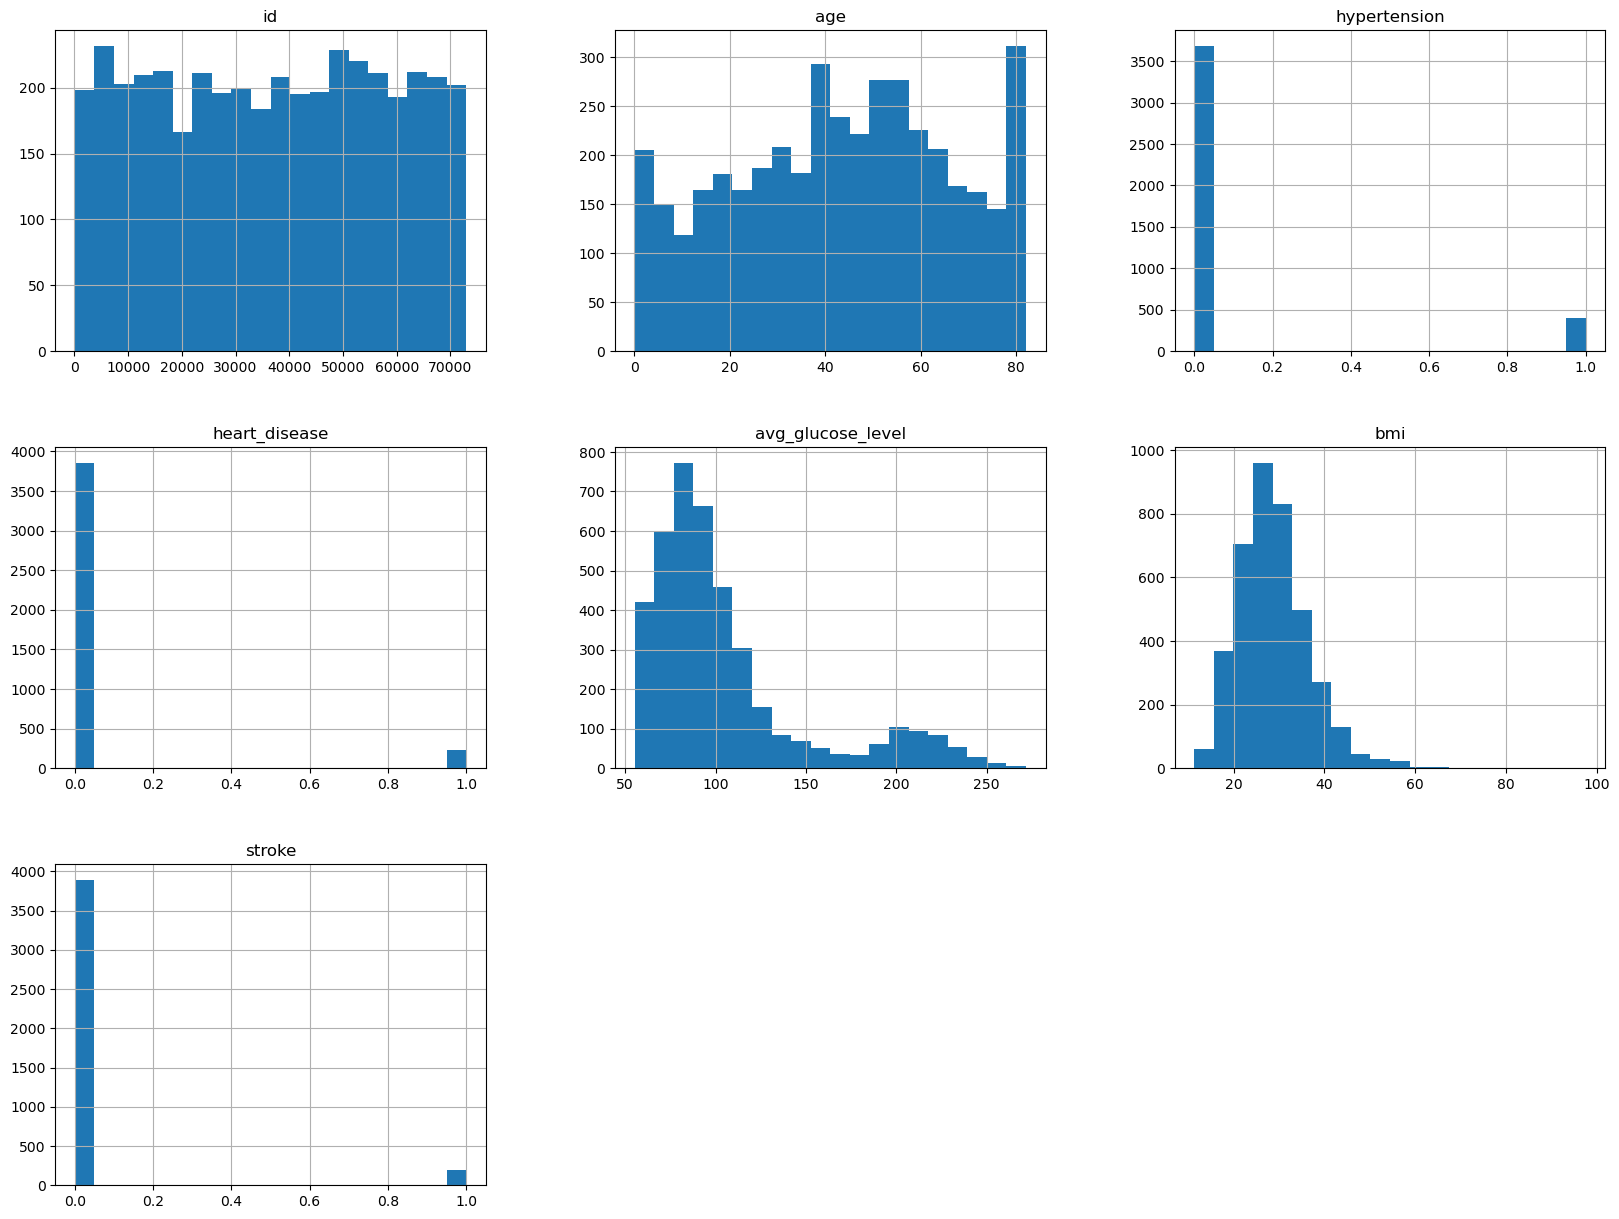

In [13]:
from matplotlib import pyplot as plt

traindata.hist(bins=20, figsize=(20,15))
plt.show()

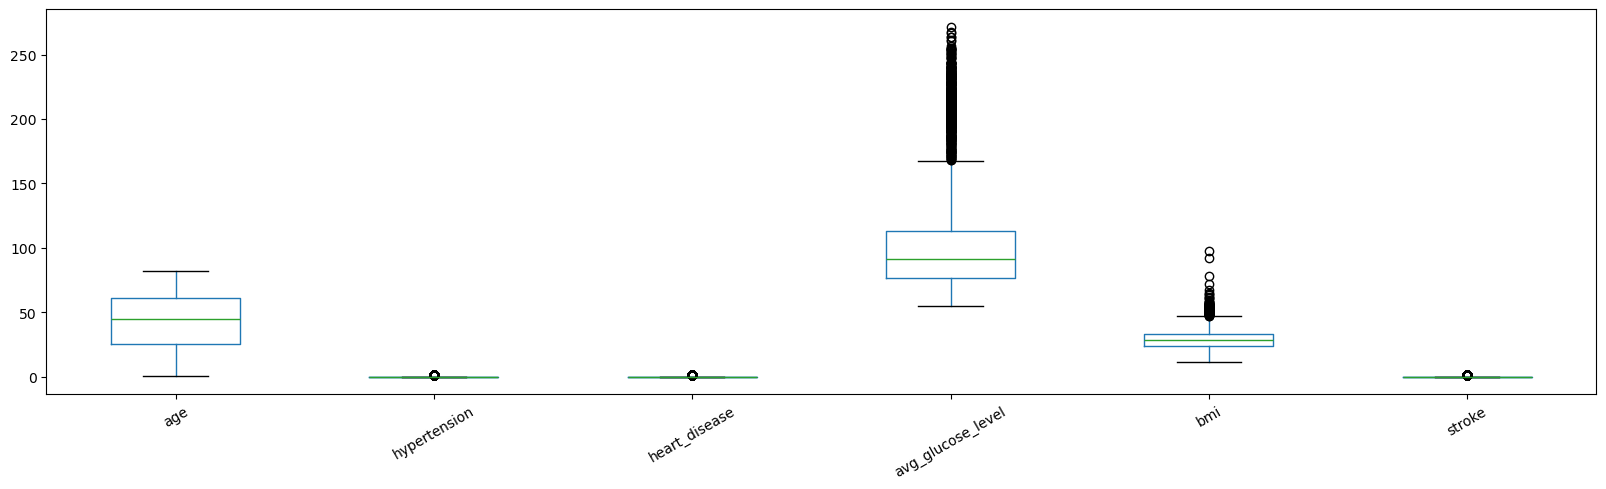

In [15]:
num_cols = [column for column in d1.columns if (traindata[column].dtypes == np.int64) or (traindata[column].dtypes == np.float64)]
num_cols.remove('id')
num_cols

traindata[num_cols].boxplot(grid=False, figsize=(20,5), rot=30)
plt.show()

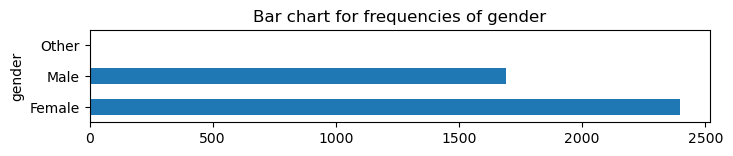

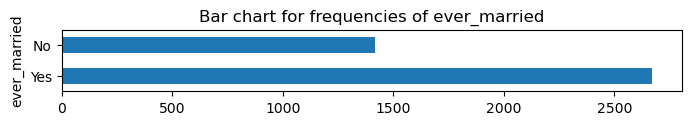

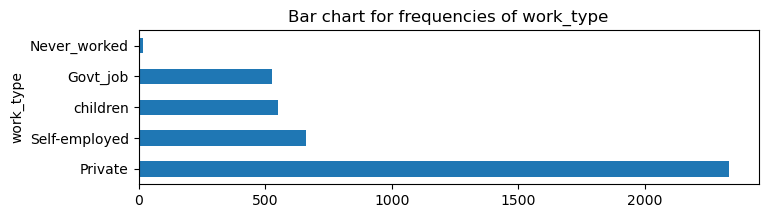

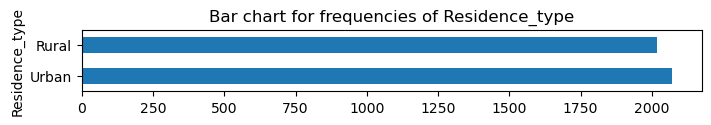

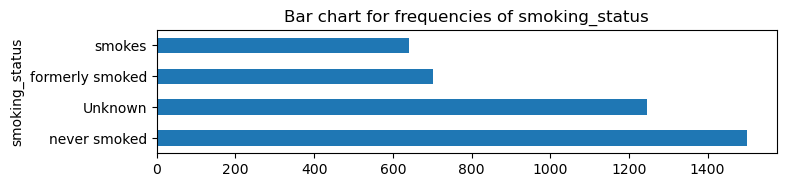

In [16]:
cat_cols = [column for column in traindata.columns if traindata[column].dtypes == object]
cat_cols

for col in cat_cols:
    freq_table = traindata[col].value_counts()
    plt.figure(figsize = (8,len(freq_table)*0.4)) #a bit formatting so that chart look better
    freq_table.plot.barh(title='Bar chart for frequencies of ' + col)
    plt.show()
    print()

In [17]:
d1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [23]:
num_cols = ['age', 'hypertension','heart_disease'] #symmetric numeric columns
log_cols = ['avg_glucose_level', 'bmi'] #skewed numneric columns
cat_cols = ['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status'] #class columns
target = ['stroke'] #target columns



In [24]:
from sklearn.preprocessing import OneHotEncoder, FunctionTransformer
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
import numpy as np

num_pipeline = Pipeline([                           
    ('impute', SimpleImputer(strategy='median')),   
    ('standardize', StandardScaler())               
])

def log_transformation(x):
    return np.log(x+0.1)

log_pipeline = Pipeline([                                        
    ('impute', SimpleImputer(strategy='median')),                
    ('log transform', FunctionTransformer(log_transformation)), 
    ('standardize', StandardScaler())                            
])

processing_pipeline = ColumnTransformer([                                                     
    ('numeric', num_pipeline, num_cols),                                                       
    ('log', log_pipeline, log_cols),                                                           
    ('class', OneHotEncoder(max_categories=5, handle_unknown='infrequent_if_exist'), cat_cols) 
  ])

processing_pipeline

ColumnTransformer(transformers=[('numeric',
                                 Pipeline(steps=[('impute',
                                                  SimpleImputer(strategy='median')),
                                                 ('standardize',
                                                  StandardScaler())]),
                                 ['age', 'hypertension', 'heart_disease']),
                                ('log',
                                 Pipeline(steps=[('impute',
                                                  SimpleImputer(strategy='median')),
                                                 ('log transform',
                                                  FunctionTransformer(func=<function log_transformation at 0x163bda680>)),
                                                 ('standardize',
                                                  StandardScaler())]),
                                 ['avg_glucose_level', 'bmi']),
                                ('class',
                                 OneHotEncoder(handle_unknown='infrequent_if_exist',
                                               max_categories=5),
                                 ['gender', 'ever_married', 'work_type',
                                  'Residence_type', 'smoking_status'])])

In [25]:
from sklearn.linear_model import LogisticRegression

logistic_pipeline = Pipeline([
    ('processing',processing_pipeline),
    ('modeling',LogisticRegression())
])

logistic_pipeline.fit(traindata, traindata[target])

logistic_pred = logistic_pipeline.predict(traindata)

from sklearn.metrics import accuracy_score
accuracy_score(traindata[target], logistic_pred)

/Users/jasminnevans/anaconda3/envs/JoeEnvironment/lib/python3.10/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.9530332681017613

In [26]:
from sklearn.tree import DecisionTreeClassifier

tree_pipeline = Pipeline([
    ('processing',processing_pipeline),
    ('modeling',DecisionTreeClassifier())
])

tree_pipeline.fit(traindata, traindata[target])

tree_pred = tree_pipeline.predict(traindata)
accuracy_score(traindata[target], tree_pred)

1.0